In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv('dataset_file.csv')

# Display the first few rows of the DataFrame to get an overview
print(df.head())


  Continent                           Country   Trade Value  Year  Action
0    Africa                            Angola  2.767000e+10  2021  Export
1    Africa                          Botswana  2.055000e+03  2021  Export
2    Africa                     Cote d'Ivoire  4.447282e+08  2021  Export
3    Africa                          Cameroon  1.865465e+09  2021  Export
4    Africa  Democratic Republic of the Congo  5.815086e+08  2021  Export


In [3]:
# Get the number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 7925
Number of columns: 5


In [4]:
# Get the data types of each column
data_types = df.dtypes
print("Data types of columns:")
print(data_types)


Data types of columns:
Continent       object
Country         object
Trade Value    float64
Year             int64
Action          object
dtype: object


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Continent      0
Country        0
Trade Value    0
Year           0
Action         0
dtype: int64


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
Series([], dtype: int64)


In [7]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicate rows
df = df.drop_duplicates()


No duplicate rows found.


In [8]:
# Clean and format column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display the updated column names
print("Updated column names:")
print(df.columns)


Updated column names:
Index(['continent', 'country', 'trade_value', 'year', 'action'], dtype='object')


In [14]:
print(df.columns)


Index(['continent', 'country', 'trade_value', 'year', 'action'], dtype='object')


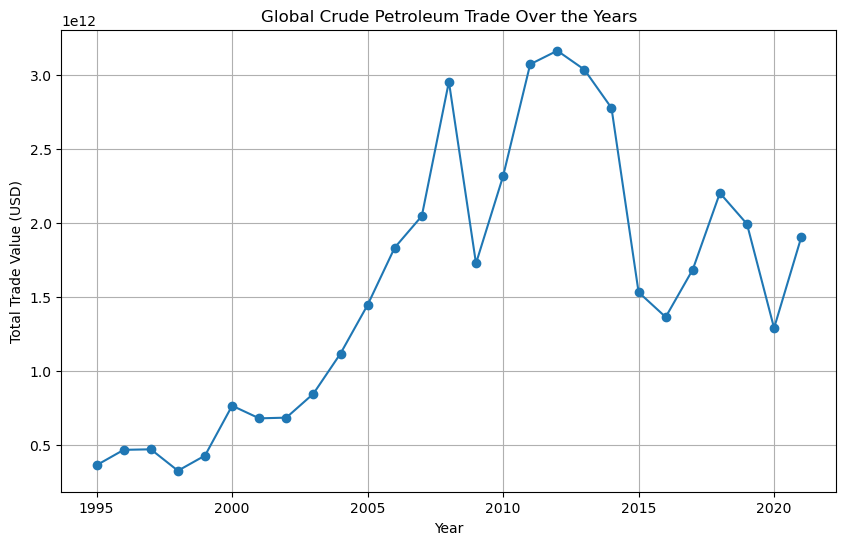

In [15]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the total trade volume for each year
yearly_trade = df.groupby('year')['trade_value'].sum()

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trade.index, yearly_trade.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Trade Value (USD)')
plt.title('Global Crude Petroleum Trade Over the Years')
plt.grid(True)
plt.show()


In [16]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


        trade_value         year
count  7.925000e+03  7925.000000
mean   5.365169e+09  2008.589148
std    1.940226e+10     7.569435
min    1.000000e+00  1995.000000
25%    1.416080e+05  2002.000000
50%    8.549274e+07  2009.000000
75%    1.828030e+09  2015.000000
max    3.283380e+11  2021.000000


/tmp/ipykernel_30198/2426825036.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


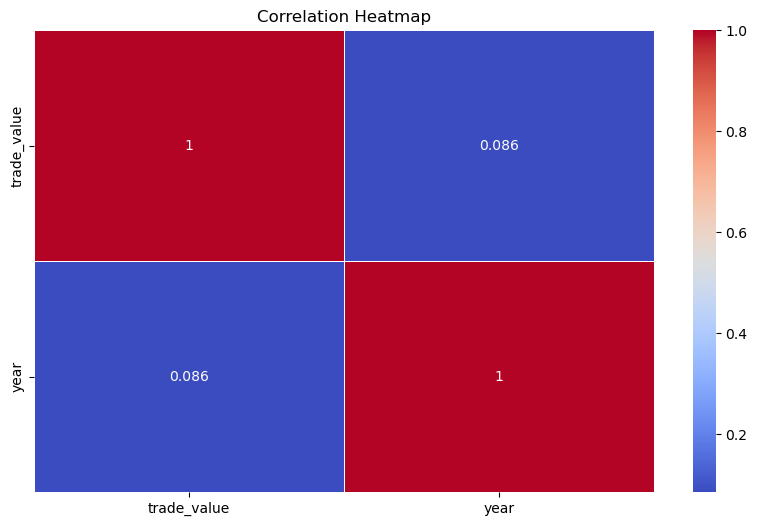

In [17]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


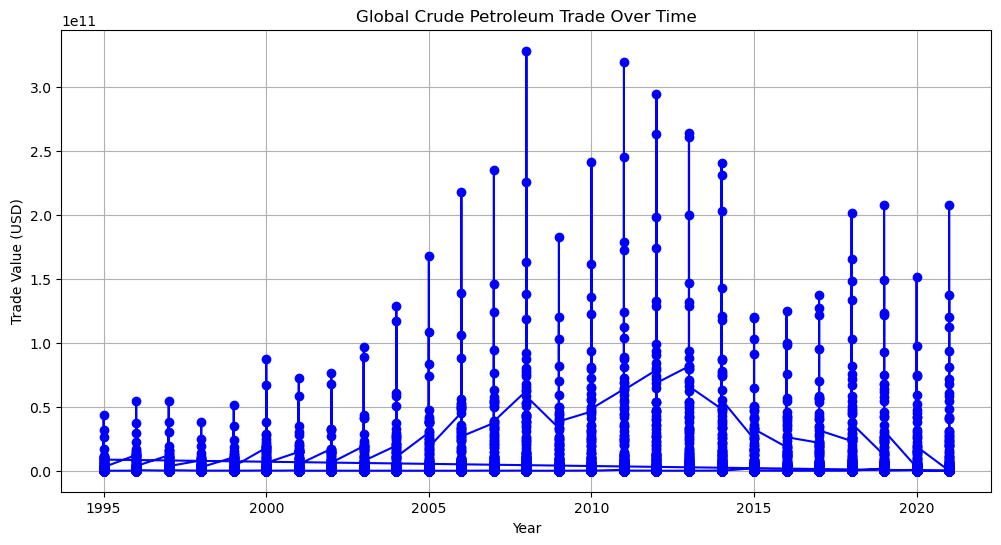

In [19]:
import matplotlib.pyplot as plt

# Create a time series plot for trade values over the years
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['trade_value'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Trade Value (USD)')
plt.title('Global Crude Petroleum Trade Over Time')
plt.grid(True)
plt.show()


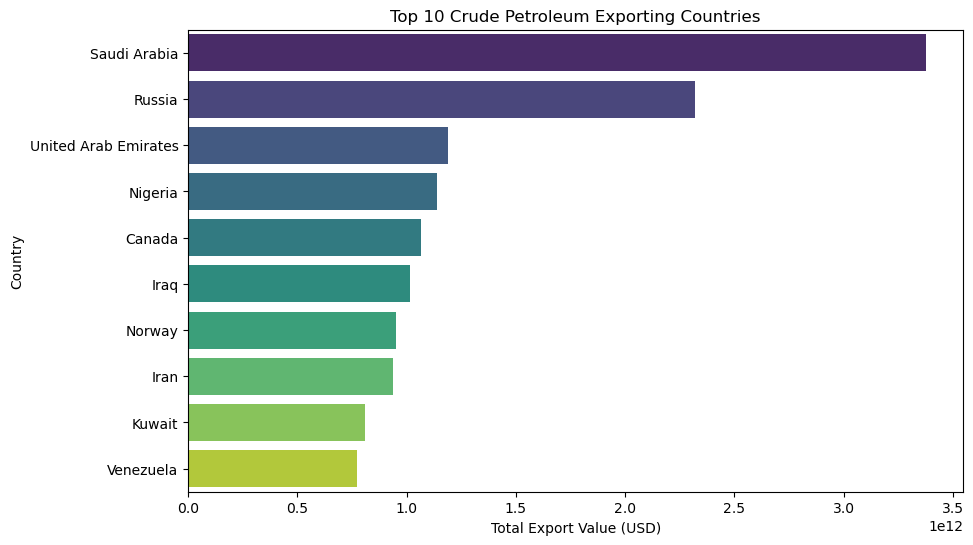

In [22]:
import seaborn as sns

# Top N exporting countries based on trade value
top_exporters = df[df['action'] == 'Export'].groupby('country')['trade_value'].sum().nlargest(10)

# Create a bar chart for the top exporting countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_exporters.values, y=top_exporters.index, palette='viridis')
plt.xlabel('Total Export Value (USD)')
plt.ylabel('Country')
plt.title('Top 10 Crude Petroleum Exporting Countries')
plt.show()


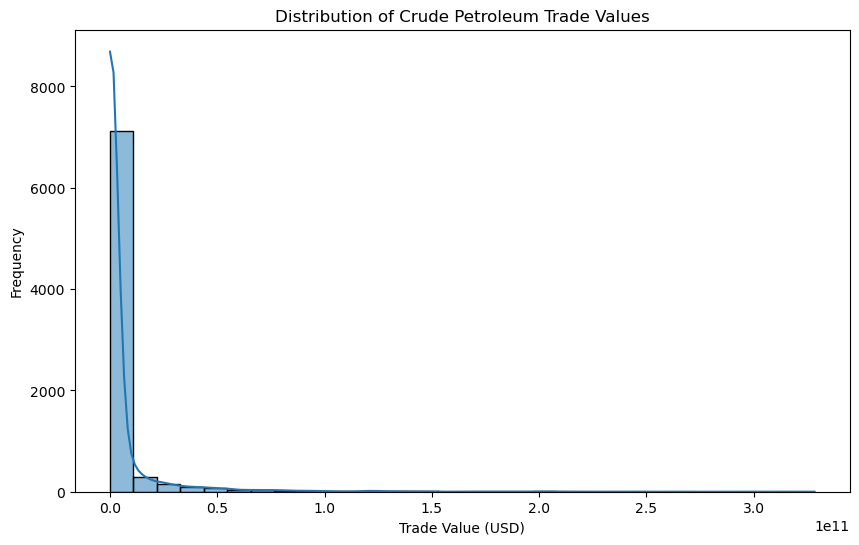

In [23]:
import seaborn as sns

# Create a histogram of trade values
plt.figure(figsize=(10, 6))
sns.histplot(df['trade_value'], bins=30, kde=True)
plt.xlabel('Trade Value (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Crude Petroleum Trade Values')
plt.show()


In [24]:
# Assuming 'year' is available, create a date/time column
df['date'] = pd.to_datetime(df['year'], format='%Y')


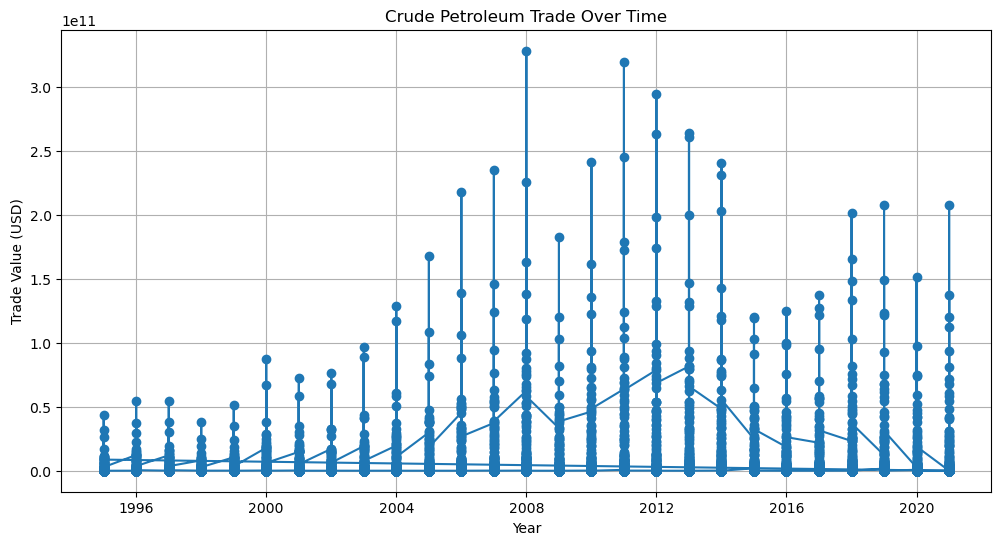

In [25]:
import matplotlib.pyplot as plt

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['trade_value'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Trade Value (USD)')
plt.title('Crude Petroleum Trade Over Time')
plt.grid(True)
plt.show()


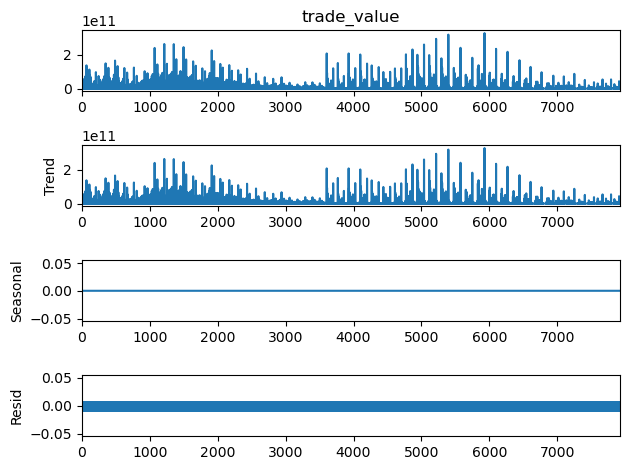

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['trade_value'], model='additive', period=1)  # Assuming no seasonality
result.plot()
plt.show()
